In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import streamlit
import joblib


In [3]:
df=pd.read_csv('telco_customer_preprocessed.csv')

In [4]:
df.head()

,SeniorCitizen,tenure,Churn,MonthlyCharges_scaled,TotalCharges_scaled,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,InternetService_FE,OnlineSecurity_FE,OnlineBackup_FE,DeviceProtection_FE,TechSupport_FE,StreamingTV_FE,StreamingMovies_FE,Contract_FE,PaperlessBilling_FE,PaymentMethod_FE
0,0,1,0,-1.160323,0.001275,1,0,0,1,1,...,0.343746,0.496663,0.344881,0.439443,0.493114,0.398978,0.395428,0.550192,0.592219,0.335794
1,0,34,0,-0.259629,0.215867,0,1,1,0,1,...,0.343746,0.286668,0.438450,0.343888,0.493114,0.398978,0.395428,0.209144,0.407781,0.228880
2,0,2,1,-0.362660,0.010310,0,1,1,0,1,...,0.343746,0.286668,0.344881,0.439443,0.493114,0.398978,0.395428,0.550192,0.592219,0.228880
3,0,45,0,-0.746535,0.210241,0,1,1,0,1,...,0.343746,0.286668,0.438450,0.343888,0.290217,0.398978,0.395428,0.209144,0.407781,0.219225
4,0,2,1,0.197365,0.015330,1,0,1,0,1,...,0.439585,0.496663,0.438450,0.439443,0.493114,0.398978,0.395428,0.550192,0.592219,0.335794


Feature Selection

Feature Selection Methods

1) ChiSquare
2) Annova
3) Mutual Information
4) Correlation Heatmap
5) RFE

1) Chisquare Used for categorical Method
2) Annova used for numerical Method
3) MI ( Compaine of Chisquare and Annova use Both For Handling Categorical & Numerical Features)

in this Feature Selection Method use MI, Correlation Heatmap and RFE Methods

############################################################################################

""""""" Correlation Heatmap """""""

Create Feature

In [5]:
feature = df.drop(columns=['Churn'])
target = df['Churn']

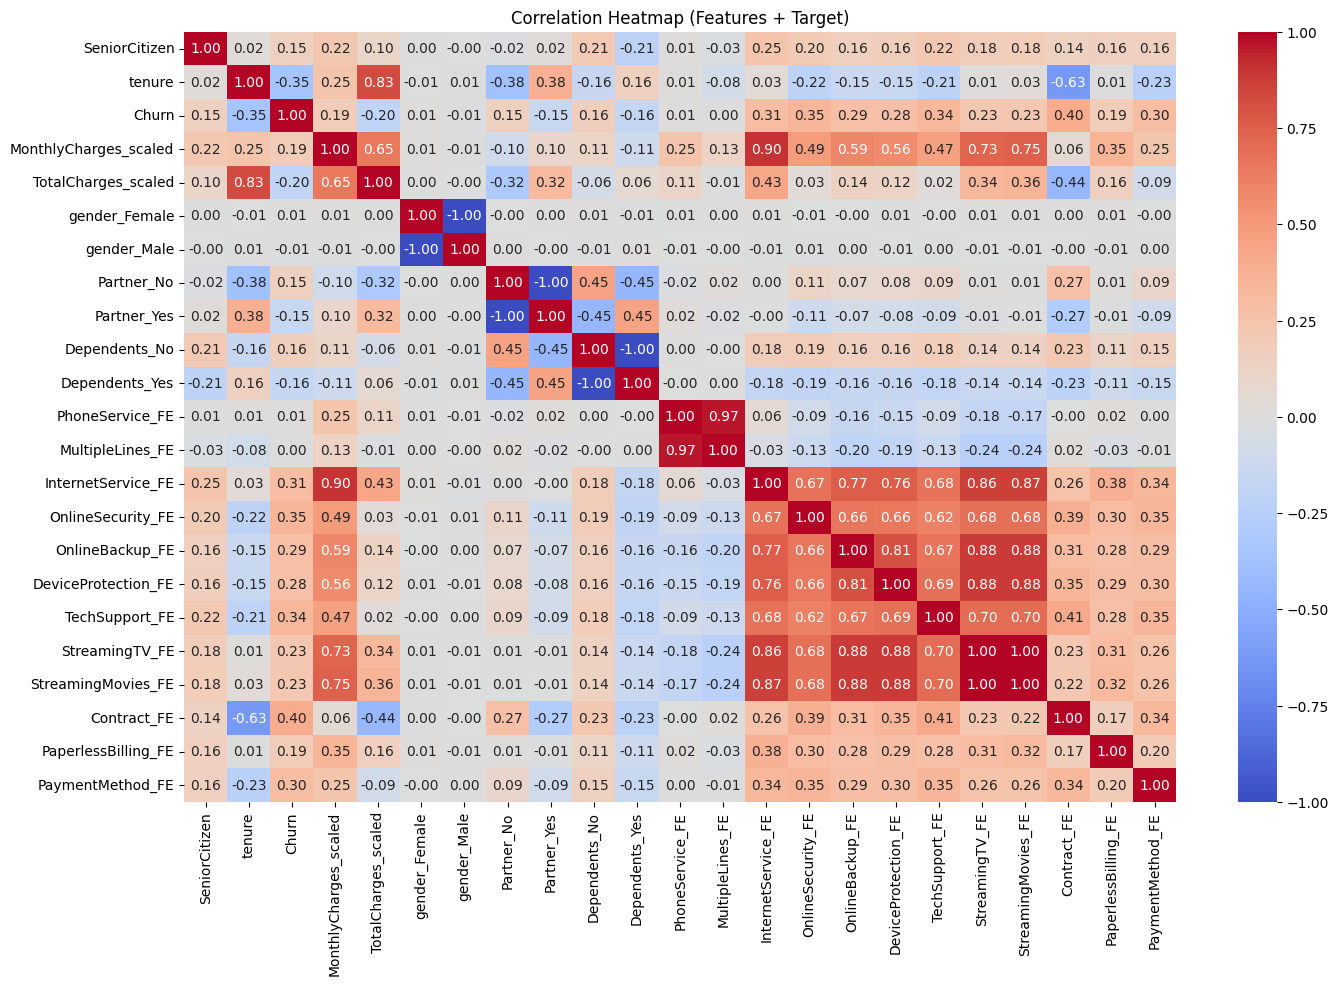

Highly correlated features with target (|correlation| > 0.2):
Contract_FE            0.400069
tenure                 0.352229
OnlineSecurity_FE      0.347173
TechSupport_FE         0.342693
InternetService_FE     0.310627
PaymentMethod_FE       0.303298
OnlineBackup_FE        0.288005
DeviceProtection_FE    0.279729
StreamingTV_FE         0.230070
StreamingMovies_FE     0.229376
Name: Churn, dtype: float64


In [6]:
# ...existing code...

# Correlation heatmap including target
corr_matrix = df.corr()

plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Features + Target)")
plt.show()

# Show features highly correlated with target (Churn)
target_corr = corr_matrix['Churn'].drop('Churn').abs()
high_corr_features = target_corr[target_corr > 0.2].sort_values(ascending=False)
print("Highly correlated features with target (|correlation| > 0.2):")
print(high_corr_features)
# ...existing code...

In [7]:
#################################################################################################

Mutual Information

Mutual Information scores (feature vs target):
Contract_FE              0.096344
tenure                   0.072026
OnlineSecurity_FE        0.070593
TechSupport_FE           0.065889
InternetService_FE       0.052159
OnlineBackup_FE          0.051235
MonthlyCharges_scaled    0.047923
PaymentMethod_FE         0.046143
TotalCharges_scaled      0.043041
StreamingTV_FE           0.036878
DeviceProtection_FE      0.035855
StreamingMovies_FE       0.032500
Dependents_No            0.018348
Dependents_Yes           0.013748
Partner_No               0.013621
PaperlessBilling_FE      0.013520
SeniorCitizen            0.008372
MultipleLines_FE         0.005789
PhoneService_FE          0.004000
Partner_Yes              0.002117
gender_Male              0.001043
gender_Female            0.000106
dtype: float64


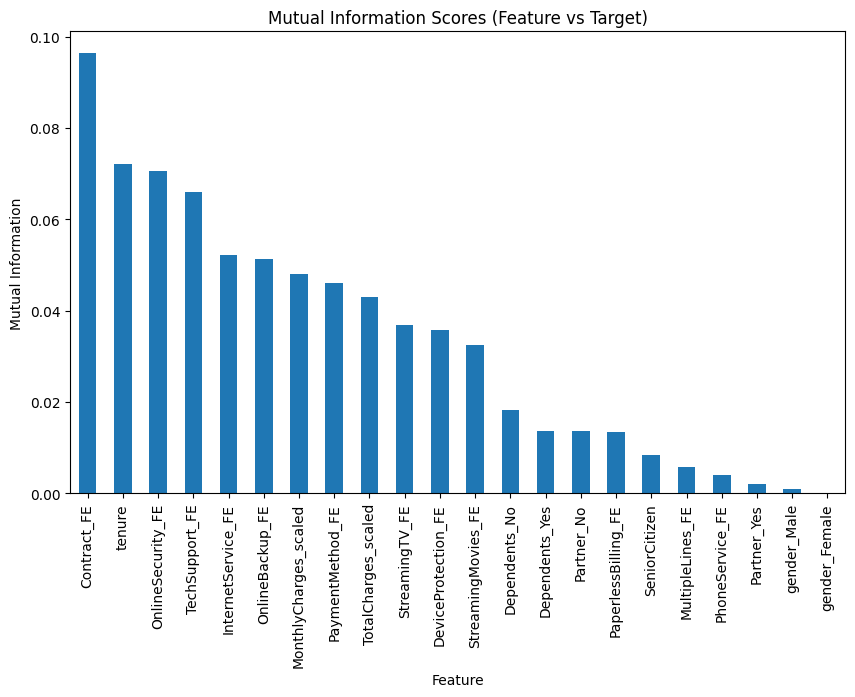

In [8]:
# ...existing code...

from sklearn.feature_selection import mutual_info_classif

# Fill missing values in features with column mean (for numeric columns)
feature_filled = feature.fillna(feature.mean())

mi_scores = mutual_info_classif(feature_filled, target, discrete_features='auto', random_state=42)
mi_series = pd.Series(mi_scores, index=feature.columns).sort_values(ascending=False)

print("Mutual Information scores (feature vs target):")
print(mi_series)

plt.figure(figsize=(10, 6))
mi_series.plot(kind='bar')
plt.title("Mutual Information Scores (Feature vs Target)")
plt.ylabel("Mutual Information")
plt.xlabel("Feature")
plt.show()
# ...existing code...

RFE Method

In [9]:
# ...existing code...

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Use RandomForestClassifier as the estimator for RFE
estimator = RandomForestClassifier(random_state=42)
rfe = RFE(estimator, n_features_to_select=10)  # Select top 10 features (change as needed)
rfe.fit(feature, target)

# Get selected features
selected_features = feature.columns[rfe.support_]
print("Selected features by RFE:")
print(selected_features)

# Optionally, show feature ranking
ranking = pd.Series(rfe.ranking_, index=feature.columns)
print("\nRFE Feature Ranking (1 = selected):")
print(ranking.sort_values())

# ...existing code...

Selected features by RFE:
Index(['tenure', 'MonthlyCharges_scaled', 'TotalCharges_scaled',
       'gender_Female', 'InternetService_FE', 'OnlineSecurity_FE',
       'OnlineBackup_FE', 'TechSupport_FE', 'Contract_FE', 'PaymentMethod_FE'],
      dtype='object')

RFE Feature Ranking (1 = selected):
tenure                    1
MonthlyCharges_scaled     1
TotalCharges_scaled       1
gender_Female             1
OnlineBackup_FE           1
InternetService_FE        1
OnlineSecurity_FE         1
TechSupport_FE            1
Contract_FE               1
PaymentMethod_FE          1
PaperlessBilling_FE       2
MultipleLines_FE          3
DeviceProtection_FE       4
Partner_Yes               5
SeniorCitizen             6
Dependents_No             7
StreamingTV_FE            8
StreamingMovies_FE        9
gender_Male              10
Partner_No               11
Dependents_Yes           12
PhoneService_FE          13
dtype: int64


In [11]:
#################################################################################################

Score Check for MI_Score, Correlation Heatmap Score, RFE Score

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, log_loss

# Helper function to evaluate a model
def evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    return {
        "accuracy": accuracy_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_proba),
        "log_loss": log_loss(y_test, y_proba)
    }

# 1. Top 10 MI features
mi_top10 = mi_series.head(10).index.tolist()
mi_results = evaluate_model(feature[mi_top10], target)
print("Logistic Regression (Top 10 MI features):", mi_results)

# 2. Top 10 Correlation features
corr_top10 = target_corr.sort_values(ascending=False).head(10).index.tolist()
corr_results = evaluate_model(feature[corr_top10], target)
print("Logistic Regression (Top 10 Correlation features):", corr_results)

# 3. RFE selected features
rfe_results = evaluate_model(feature[selected_features], target)
print("Logistic Regression (RFE selected features):", rfe_results)

Logistic Regression (Top 10 MI features): {'accuracy': 0.8097941802696949, 'f1': 0.6081871345029239, 'roc_auc': np.float64(0.8583060751291315), 'log_loss': 0.40463392684451704}
Logistic Regression (Top 10 Correlation features): {'accuracy': 0.8112136266855926, 'f1': 0.6017964071856288, 'roc_auc': np.float64(0.8543868456737089), 'log_loss': 0.4100541461055266}
Logistic Regression (RFE selected features): {'accuracy': 0.8112136266855926, 'f1': 0.6133720930232558, 'roc_auc': np.float64(0.8572722473526763), 'log_loss': 0.405718363479264}


in this analysing RFE Score and ROC_AUC Score and loss score is better compare to Correlation and MI Feature Selection Method 

In [15]:
################################################################################################